## Multiple linear regression and model selection

### Predicting the Olympic Games 

The Olympic Games have always mixed pure sporting spectacle with national competition. During the Cold
War the USA and the Soviet Union competed fiercely to win the most medals in each games. On a somewhat
milder level, in Britain we often compare our medal count with that of Australia, one of our traditional
sporting rivals. If you were in the UK during the summers of 2012 and 2016 you cannot have missed the
excitement caused by the UK’s success relative to previous years.
Figure

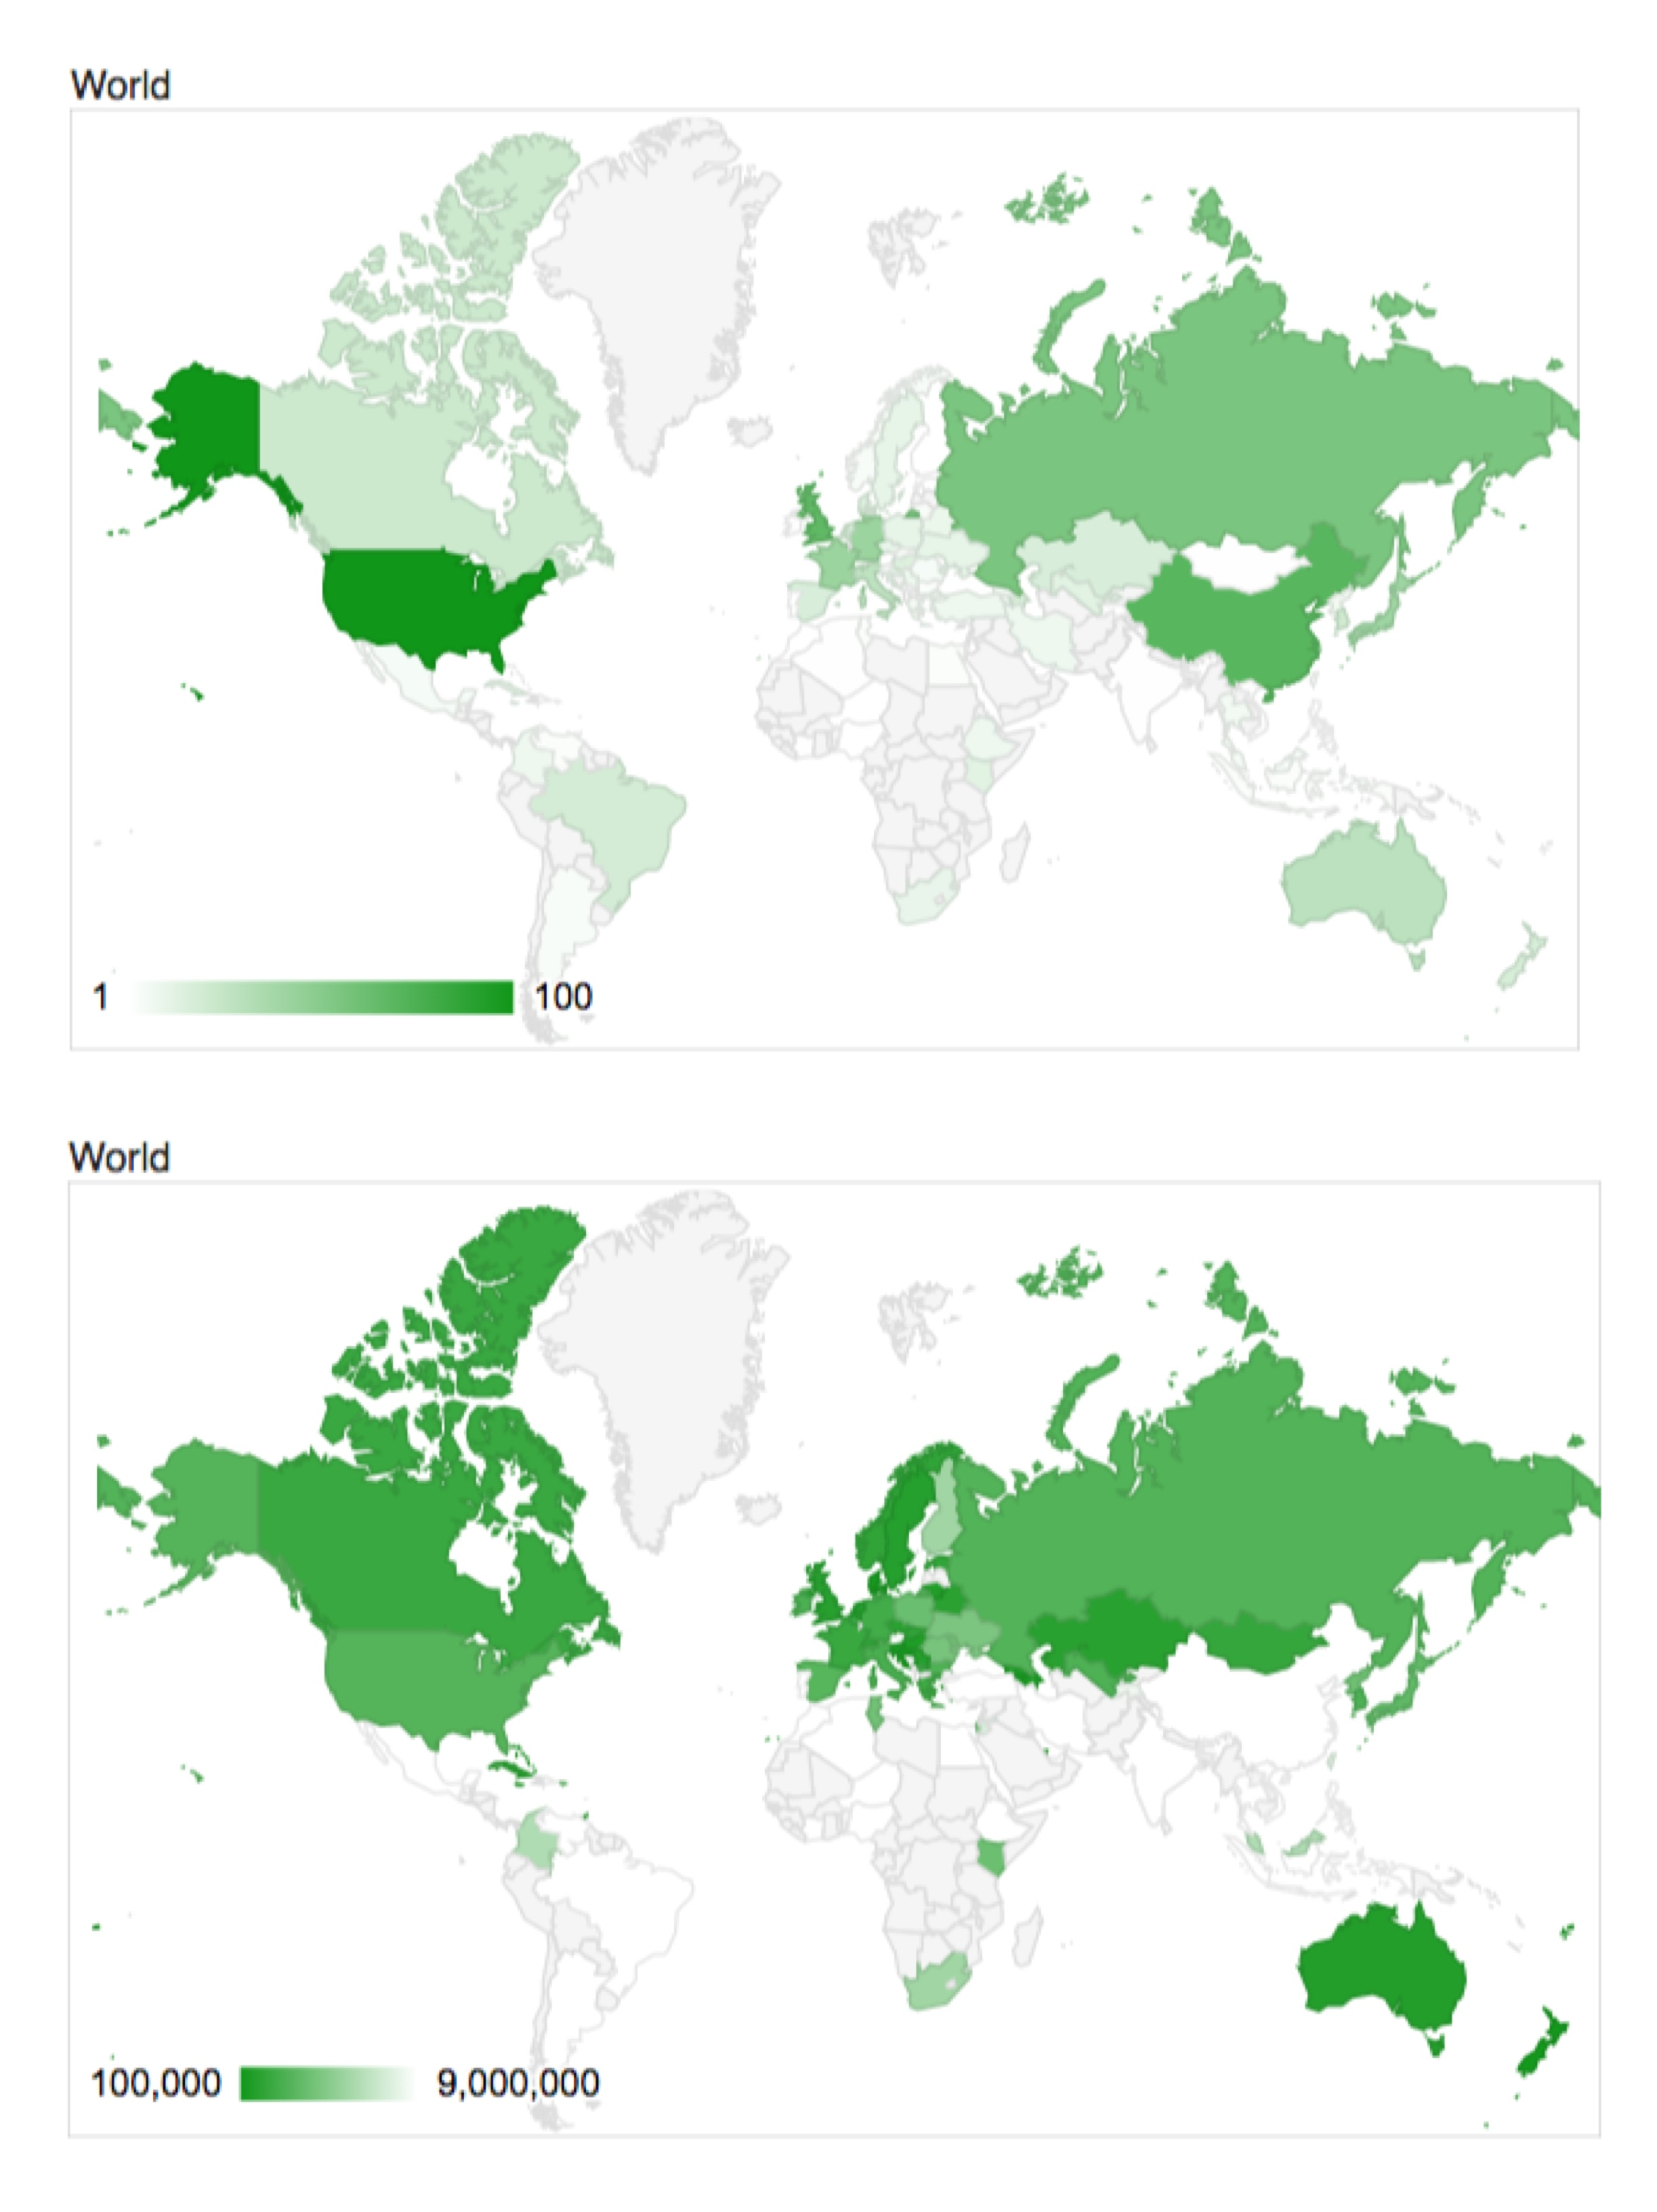
Figure 1: Total medals per country (top) and medals per capita (bottom) in the Rio 2016 Olympic Games
(credit: http://www.medalspercapita.com/)

This competition is usually expressed in terms of the number of medals won by each country’s athletes
((Figure 1 top panel). However, many interested watchers, especially those from smaller countries, have
pointed out that the medal table is hardly a fair reflection of a country’s sporting prowess. Some countries
have a strong tradition of sporting excellence, but are simply too small to make an impact in terms of total
medals. These commentators would rather look at the per capita medal count (Figure 1 bottom panel).

Looking at the per capita map above though, we see that large areas of the world are still very underrepresented.
Specifically, poorer countries do not win many medals per head of population. There are many
reasons for this, including a lack of investment in sport and facilities, and fewer individuals who are wealthy
enough to devote their life to training. As such, it has been suggested that we should compensate for wealth
when measuring a country’s Olympic performance.
In this practical you will investigate how the number of medals a country wins can be predicted from national
population and GDP, and how consistent these relationships are. This practical will run over this week and
the next.
Begin by downloading the data file medals.csv from MINERVA
This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

* Country name (as recognised by the IOC)
* Population
* GDP (in billions of US dollars)
* Medals won in Beijing 2008, London 2012 and Rio 2016

Tasks (Regression, week 4):

1. Perform a linear regression to predict the medal count in 2008 and 2012 (separately, in two regressions)
from Population and GDP and report your results.
2. How consistent are the effects of Population and GDP over time?
3. Using the regression for the 2012 medal count make a prediction for the results of 2016.
4. Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation
of the axes to make it these clearer. How good are the predictions? Which countries are outliers from
the trend?

Tasks (Model Selection, week 5):

1. Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP
alone; (iii) Population and GDP. Select the model that minimises the Akaike Information Criterion.
2. Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii)
Population and GDP. Does your result agree with the model selected by AIC?
3. Using the three fitted models from Q1, predict the results of Rio 2016. Which predicts best? Compare
this result with earlier answers.

## Week 4:

### Task 1:

1. Perform a linear regression to predict the medal count in 2008 and 2012 (separately, in two regressions)
from Population and GDP and report your results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from statsmodels.formula.api import glm

medals=pd.read_csv("medals.csv") # this line reads the csv file so we can extrect and use the data we need
# Label the GDP and Poplulation data as the x values as these will model the medal output which is why the 2 years of the Olympics are the y values
x1= medals.GDP 
x2= medals.Population
y1= medals.Medal2008
y2= medals.Medal2012
#set a dataframe with all the data we will need for the linear regression
df=pd.DataFrame({'y1': y1,'y2':y2,'x1':x1,'x2':x2})
df.head()
#Set the formula for the lienar regression for both y1 and y2
formula1 = 'y1 ~ x1 + x2 ' 
formula2 = 'y2 ~ x1 + x2 '
# define the variables for the glm for we can print the summary 
my_multiple_data1 = glm(formula1, df).fit()
my_multiple_data2 = glm(formula2, df).fit()
print(my_multiple_data1.summary())
print(my_multiple_data2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     y1   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          133.15
Method:                          IRLS   Log-Likelihood:                -272.86
Date:                Thu, 10 Mar 2022   Deviance:                       9053.9
Time:                        15:31:58   Pearson chi2:                 9.05e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6133      1.506      3.728      0.0

### Task 2:
2. How consistent are the effects of Population and GDP over time?

The coefficients for the linear regression for GDP and Population over time for the 2008 are 0.0076 and 8.435e-09 so as you can see GDP has a much bigger effect. In 2012 the coefficient for GDP was again 0.076 and the coefficient for Population is 5.247e-09 so we can see that GDP stays consistent in the 2 years while effect of Gdp has decreased. Also if we look at the the standard error over 2008 and 2012 for the coefficeints of Population and GDP we see that the error for Population was 0.001 for both years so consistent and the error is low compared to the value of the coefficient. The standard error for GDP in 2008 was 7.22e-09 while it was 7.19e-09 in 2012. There isn't a lot of fluctuation between the standard error between the 2 years but the value of the standard error is very large compared to the coefficient showing that effectf of Population over time is inconsistent and that overall GDP has a much more consistent effect.

### Task 3:
Using the regression for the 2012 medal count make a prediction for the results of 2016.

In [2]:
# To generate the prediction we need to use the .predict() command 
m=my_multiple_data2.predict()
C =medals.Country



predict = pd.DataFrame({'Country':C, '2016 Prediction':m})
print(predict)

          Country  2016 Prediction
0         Algeria         7.697937
1       Argentina         9.660081
2         Armenia         6.170773
3       Australia        16.572245
4      Azerbaijan         6.603459
..            ...              ...
66         Turkey        12.315867
67        Ukraine         7.565541
68  United States       121.892569
69     Uzbekistan         6.572002
70      Venezuela         8.612422

[71 rows x 2 columns]


### Task 4:
4. Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation
of the axes to make it these clearer. How good are the predictions? Which countries are outliers from
the trend?

<function matplotlib.pyplot.legend(*args, **kwargs)>

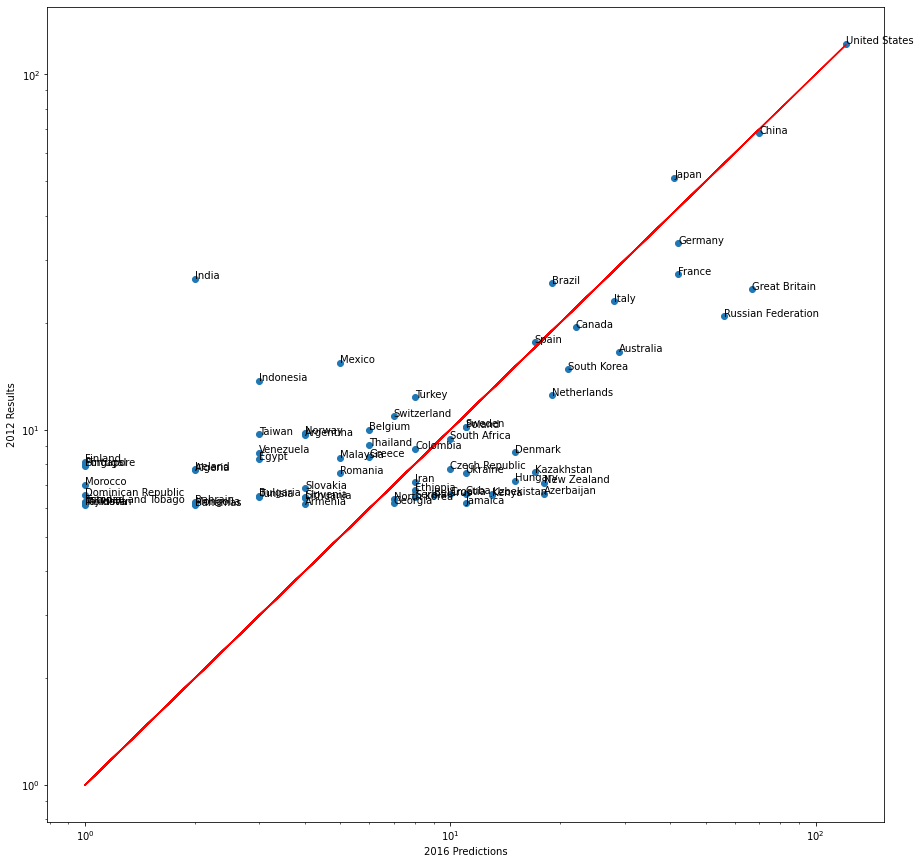

In [11]:
import matplotlib.pyplot as plt
ax = plt.gca()
C =medals.Country
m=my_multiple_data2.predict()
M16=medals.Medal2016
plt.rcParams["figure.figsize"] = (15, 15)
plt.xlabel('2016 Predictions')
plt.ylabel('2012 Results')
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(M16,m)
plt.plot(M16,M16,color="red",linestyle='solid') # Add y=x line to show which predictions are close to the real results 
# add labels to the country so we can see whcih countries are the outliers
for i, txt in enumerate(C):
    plt.annotate(txt, (M16[i], m[i]))
plt.legend

The outliers are the countries that are far away from the red y=x red line

### Week 5

#### Task 1:
 Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP
alone; (iii) Population and GDP. Select the model that minimises the Akaike Information Criterion.

In [29]:
#(i)  
x1= medals.Population
x2= medals.GDP
y= medals.Medal2012
# Linear Regression for Population only
df_x1=pd.DataFrame({'y': y,'x1':x1})
df_x1.head()
# Linear Regression for Population only

formula_x1= 'y ~ x1 '
my_multiple_data_x1 = glm(formula_x1, df_x1).fit()
print(my_multiple_data_x1.summary())

# Linear regression for GDP only 
df_x2=pd.DataFrame({'y': y,'x2':x2})
df_x2.head()

formula_x2= 'y ~ x2 '
my_multiple_data_x2 = glm(formula_x2, df_x2).fit()
print(my_multiple_data_x2.summary())

# Linear regression for Population and GDP


df_x1x2=pd.DataFrame({'y': y,'x1':x1,'x2':x2})
df_x1x2.head()

formula_x1x2 = 'y ~ x1 + x2 '
my_multiple_data_x1x2 = glm(formula_x1x2, df_x1x2).fit()
print(my_multiple_data_x1x2.summary())

#Akaike Information Criterion Caclulations

print("The AIC for the linear regression model for just Population is ", my_multiple_data_x1.aic)
print("The AIC for the linear regression model for just GDP is ",my_multiple_data_x2.aic)
print("The AIC for the linear regression model for just Population and GDP is ",my_multiple_data_x1x2.aic)
print("Therefore the model we select, as it has the smallest AIC is the linear regression model with only GDP")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   71
Model:                            GLM   Df Residuals:                       69
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          334.46
Method:                          IRLS   Log-Likelihood:                -306.07
Date:                Thu, 10 Mar 2022   Deviance:                       23077.
Time:                        15:50:41   Pearson chi2:                 2.31e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3225      2.295      4.498      0.0

### Task 2 :
2. Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii) Population and GDP. Does your result agree with the model selected by AIC?

In [16]:

df_x1x2=pd.DataFrame({'y': y,'x1':x1,'x2':x2})
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_x1x2, test_size=0.5)
print(train_data)
print(test_data)


     y          x1       x2
50   9    19042936   179.79
24   7     4469200    14.37
45  13     4432620   130.68
44  20    16731770   836.26
59   8     9490683   538.13
17   9     5580516   332.68
61   2    23234003   466.00
18   2     9378818    55.61
12  88  1347350000  7298.10
48  10    38501000   514.50
39   2    28334135   278.67
51  81   143056383  1857.77
69   4    29123400    45.36
49   1    10561614   237.52
22   3     5407040   266.07
31  12    76309000    86.53
11  18    34771400  1736.05
36  13    16718000   186.20
7   12     9461400    55.14
53   2     5183700   239.70
52   4     7120666    45.04
21   7    84320987    31.71
58  17    46196278  1490.81
46   6    24052231    22.00
55   4     2057540    49.54
32   5     4588252   217.28
70   1    27150095   316.48
8    3    10951266   511.53
60   4     7870100   635.65
2    3     3268500    10.25
16  10    10504203   215.22
5    1      353658     7.79
27   2    10787690   298.73
23  34    65350000  2773.03
38   5     3192800  

[-183.2334384726977, -172.6618528161862, -183.42042707314985]
1


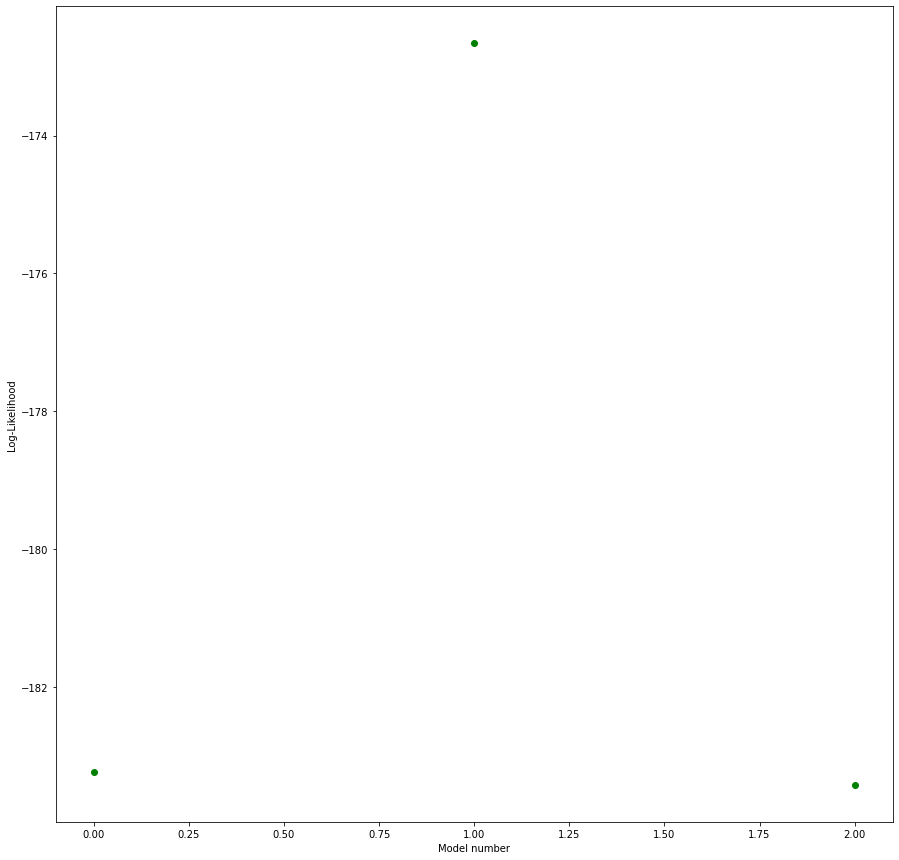

In [17]:
from scipy.stats import norm
#list all the models for x1, x2 
formula = ['y ~ x1','y ~ x2','y ~ x1 + x2']

predictive_log_likelihood = []
for i in formula:
    current_model = glm(i, train_data).fit()
    
    sigma = np.sqrt(current_model.scale)
    
    
    ypredict_mean = current_model.predict(test_data)
    ypredict_meandf=pd.DataFrame({'ypredict_mean': ypredict_mean})
    predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['y']] , loc = ypredict_meandf[['ypredict_mean']] , scale = sigma )))
    
print(predictive_log_likelihood)  
ModelNumber = np.arange(0,len(formula),1,dtype='int')
plt.scatter(ModelNumber,predictive_log_likelihood,color='green')
plt.xlabel("Model number")
plt.ylabel("Log-Likelihood")

print(np.argmax(predictive_log_likelihood))

In [18]:
winner = []
rep = 100
for j in range(rep):
    #Make a new random training data - test data split
    train_data, test_data = train_test_split(df, test_size=0.5)
    predictive_log_likelihood = []
    for i in formula:
        #First fit a linear regression model with the training data 
        current_model = glm(i, train_data).fit()
    
        #Extract the 'dispersion parameter' from the model - recall this is the unbiased estimate for the residual variance.
        #Here I assume that the dispersion parameter is the same as the scale parameter in the model summary
        sigma = np.sqrt(current_model.scale)

        #Now use this model to evaulate the probability of the test outputs
        #Get the predicted mean for each new data point
        ypredict_mean = current_model.predict(test_data)
        ypredict_meandf = pd.DataFrame({'ypredict_mean': ypredict_mean})
        
        #Now calculate the predictive log probability by summing the 
        #log probability of each output value in the test data
        predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['y']] , loc = ypredict_meandf[['ypredict_mean']] , scale = 1 )))
    
    winner.append(np.argmax(predictive_log_likelihood))

#Plot a histogram of how often each model wins
ModelNumber = np.arange(0,3,0.5)
plt.hist(winner,bins=ModelNumber)
plt.xlabel("Model")
plt.ylabel("Frequency")

PatsyError: Number of rows mismatch between data argument and y (35 versus 71)
    y ~ x1
    ^

In [19]:
df_x1=pd.DataFrame({'y': y,'x1':x1})
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_x1x2, test_size=0.5)
print(test_data[['x1']])

#List of all possible models 
formula = ['y ~ x1']

predictive_log_likelihood = []
for i in formula:
    
    print(i)
    
    #First fit a linear regression model with the training data 
    current_model = glm(i, train_data).fit()
    sigma = np.sqrt(current_model.scale)
    
    ypredict_mean = current_model.predict(test_data)
    ypredict_meandf=pd.DataFrame({'ypredict_mean': ypredict_mean})predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['Y']] , loc = ypredict_meandf[['ypredict_mean']] , scale = sigma )))
    predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['y']] , loc= ypredict_meandf[['ypredict_mean']] , scale = 1 )))
    
print(predictive_log_likelihood)
#This time plot the log-likelihood as points
ModelNumber = np.arange(0,len(formula),1,dtype='int')
plt.scatter(ModelNumber,predictive_log_likelihood,color='green')
plt.xlabel("Model number")
plt.ylabel("Log-Likelihood")

print(np.argmax(predictive_log_likelihood))

SyntaxError: invalid syntax (<ipython-input-19-f541c60dfedf>, line 19)

### Task 3:
3. Using the three fitted models from Q1, predict the results of Rio 2016. Which predicts best? Compare

In [20]:
m_x1=my_multiple_data_x1.predict()
m_x2=my_multiple_data_x2.predict()
m_x1x2=my_multiple_data_x1x2.predict()
C =medals.Country

predict_x1 = pd.DataFrame({'Country':C, '2016 Prediction':m_x1})
print(predict_x1)

predict_x2 = pd.DataFrame({'Country':C, '2016 Prediction':m_x2})
print(predict_x2)

predict_x1x2 = pd.DataFrame({'Country':C, '2016 Prediction':m_x1x2})
print(predict_x1x2)

          Country  2016 Prediction
0         Algeria        11.816319
1       Argentina        11.937801
2         Armenia        10.454111
3       Australia        11.243783
4      Azerbaijan        10.689360
..            ...              ...
66         Turkey        13.331241
67        Ukraine        12.160356
68  United States        22.940674
69     Uzbekistan        11.495145
70      Venezuela        11.415691

[71 rows x 2 columns]
          Country  2016 Prediction
0         Algeria         7.710687
1       Argentina         9.721830
2         Armenia         6.316074
3       Australia        16.957674
4      Azerbaijan         6.731495
..            ...              ...
66         Turkey        12.278453
67        Ukraine         7.527558
68  United States       124.211089
69     Uzbekistan         6.590494
70      Venezuela         8.709576

[71 rows x 2 columns]
          Country  2016 Prediction
0         Algeria         7.697937
1       Argentina         9.660081
2        

<function matplotlib.pyplot.legend(*args, **kwargs)>

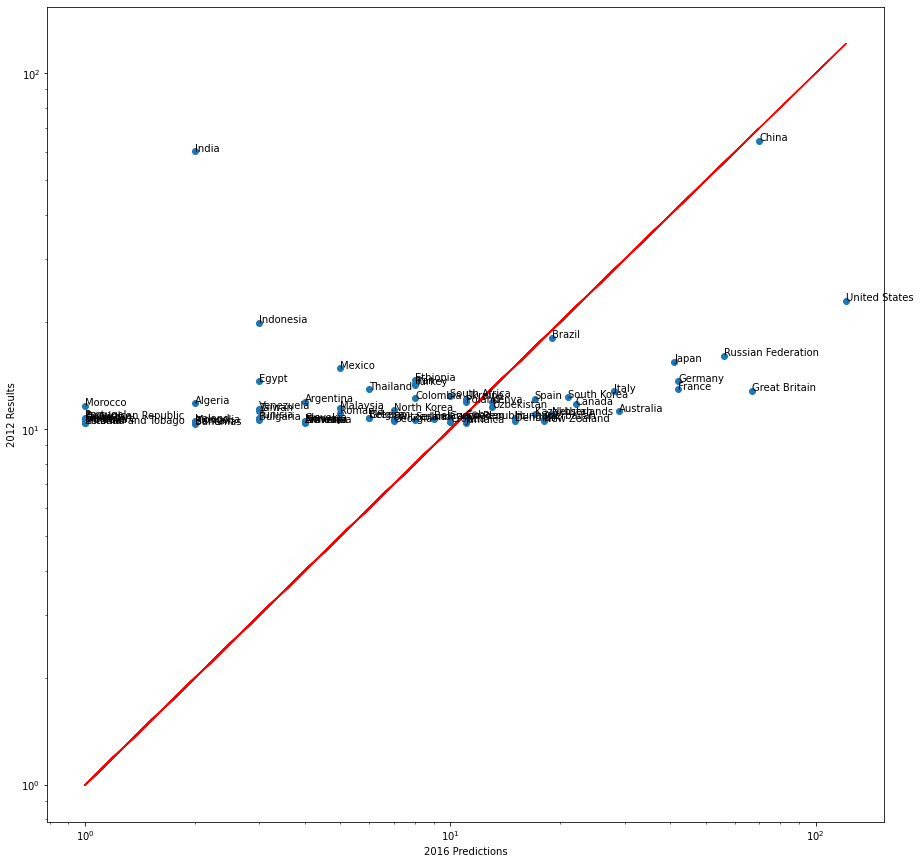

In [25]:
import matplotlib.pyplot as plt
ax = plt.gca()
C =medals.Country
m_x1=my_multiple_data_x1.predict()
m_x2=my_multiple_data_x2.predict()
m_x1x2=my_multiple_data_x1x2.predict()
M16=medals.Medal2016

plt.rcParams["figure.figsize"] = (15, 15)
plt.ylabel('2016 Predictions')
plt.xlabel('2016 Results')
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(M16,m_x1)
plt.plot(M16,M16,color="red",linestyle='solid')

for i, txt in enumerate(C):
    plt.annotate(txt, (M16[i], m_x1[i]))
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

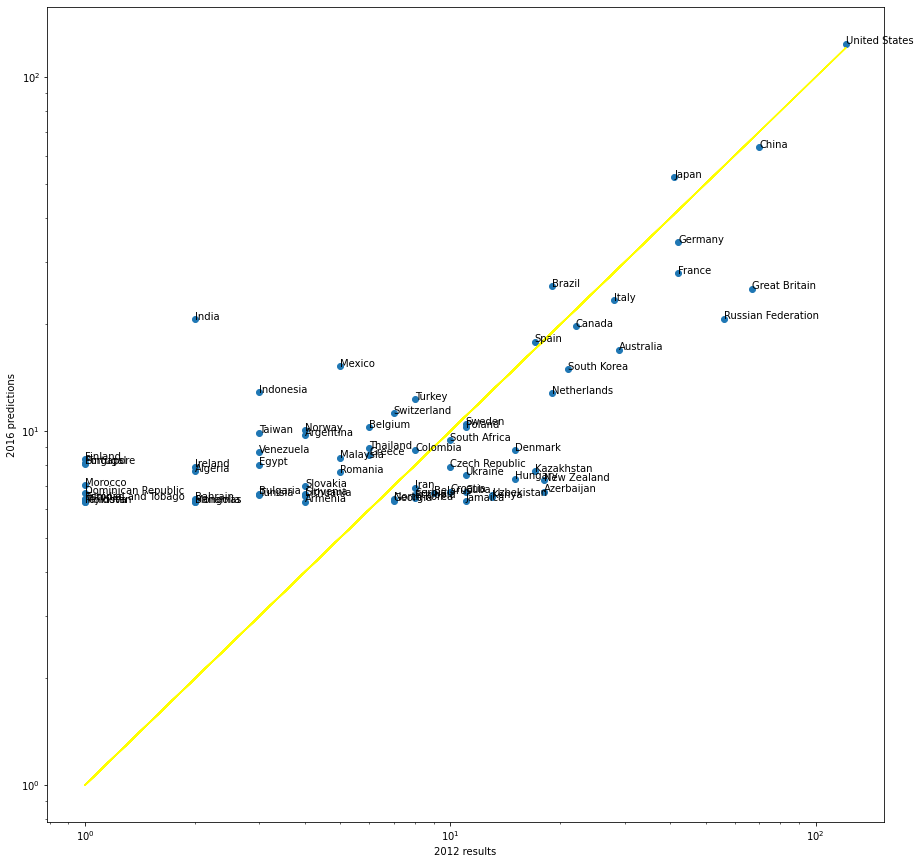

In [27]:
ax = plt.gca()
plt.xlabel('2016 results')
plt.ylabel('2016 predictions')
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(M16,m_x2)
plt.plot(M16,M16,color="yellow",linestyle='solid')# Add y=x line to show which predictions are close to the real results 
# add labels to the country so we can see whcih countries are the outliers

for i, txt in enumerate(C):
    plt.annotate(txt, (M16[i], m_x2[i]))

plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

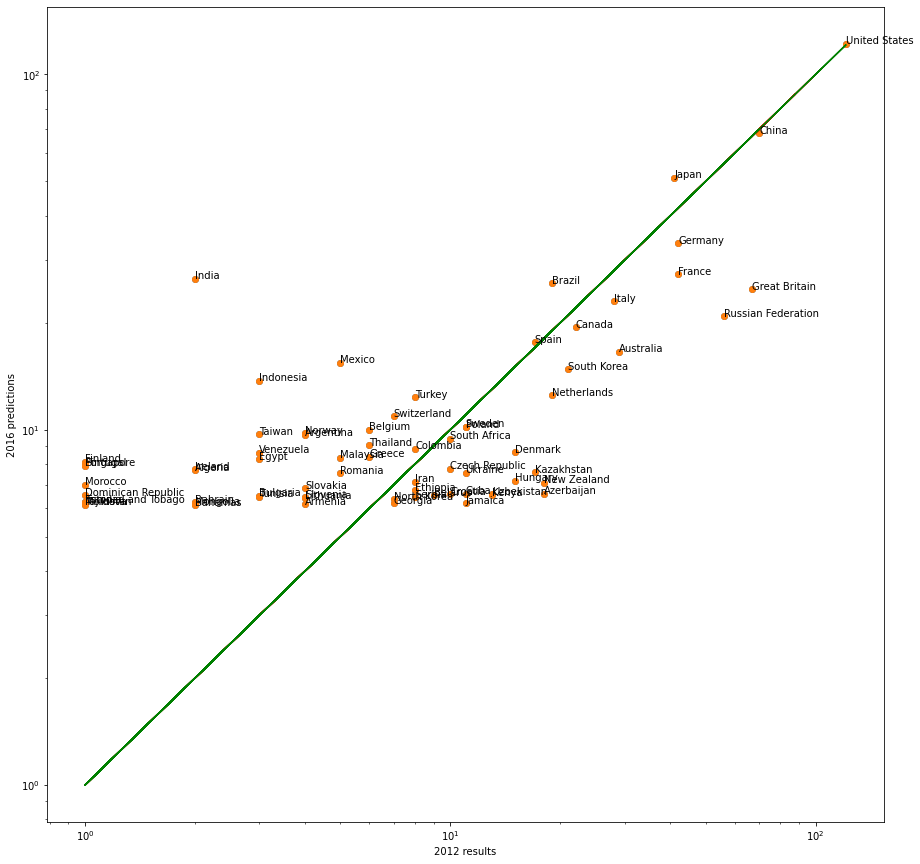

In [28]:
ax = plt.gca()
plt.xlabel('2016 results')
plt.ylabel('2016 predictions')
plt.scatter(M16,m_x1x2)
plt.plot(y2,y2,label="y=x line",color="red")
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(M16,m_x1x2)
plt.plot(M16,M16,color="green",linestyle='solid')# Add y=x line to show which predictions are close to the real results 
# add labels to the country so we can see whcih countries are the outliers
for i, txt in enumerate(C):
    plt.annotate(txt, (M16[i], m_x1x2[i]))
plt.legend

By looking at the graph where we compare the predictions using each fitted model , the best prediction is the model where both GDP and Population is used in th elinear regression as when plotting results against predictions we see that the GDP and Population model data has the closest fit to a y=x line so is the closest prediction to a previous results so therefore the most realistic.

### Self-Assessment

#### Week 4:

$Task 1 (10)$: mark awarded 10 as 2 sepeate linear regression s were performed b=for noth 2008 and 2012 from Population and GDP
$Task 2 (10 marks):$ 10 marks awarded as consistenices of the effects of t GDP AND poulation has been discuessed
$Task  3  (10mark):$ 10 marks awrded as predictions were made using 2012 results for 2016

$Task 4 (10marks):$ 10 marks awarded  predictions against result was ploteed and with logscales so points were easy to see with labels so user can look ayt which countries had accurate presictions and which didn't 
#### Week 5:
$Task 1 (10 marks )$: 10 marks awarded as all 3 linear regressions were performed with the Akaike infromation Criterion outputted for all 3.
$Task 2 (10 marks):$ 3 marks awarded as attempt to cross validate with all of the coed but code unable to run

$Task  3  (10mark):$ 10 marks awarded as 3 predictins were made with 3 linear regressions. Then plotted these predictions against actual results showing which is the best prediction. Also an explanaition of which the best prediction was made.

Presentation of the report in a Jupyter Notebook (20 marks): 20 marks awarded as all tasks are shown clearly with clear annotations. label axis have been provided and axis lines on each graph with labels to show which countreis are which making all graphs easy to read. . Each task has its own heading so very easy to find where each task is. 
 

Bonus point (10 marks): 10 marks awarded In task 3 week 5 i created detailed graphs to show each prediction and how similar they were to the results

### Total Mark : 93/100